<a href="https://colab.research.google.com/github/bemadi/dojo-env-setup/blob/main/Use_CDF_to_Calculate_Probabilities_(Practice).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRxp-hsw61ck9cpt5ExZIUhvSGT5zYzoUJl_7xr7YF5qZeazC8393q2taqwkDvMxVirgFDJm1WX3uAC/pub?output=csv')
males = df.loc[ df['Gender'] == 'Male'].copy()
females = df.loc[ df['Gender'] == 'Female'].copy()

Use the normal cumulative distribution function with the mean and standard deviation of female height to calculate the probability that a female height is:

1. Between 55 and 56 inches
2. Less than 5 feet (60 inches)
3. Is greater than the mean (hint: do you know this answer intuitively?)

# 1

In [3]:
data = females['Height']
low_end = 55.0
high_end = 56.0

In [4]:
mean = np.mean(data)
std = np.std(data)
min = np.min(data)
max = np.max(data)

In [6]:
x_range = np.linspace(min, max, 1000)

In [10]:
cdf = stats.norm.cdf(x_range, loc=mean, scale=std)

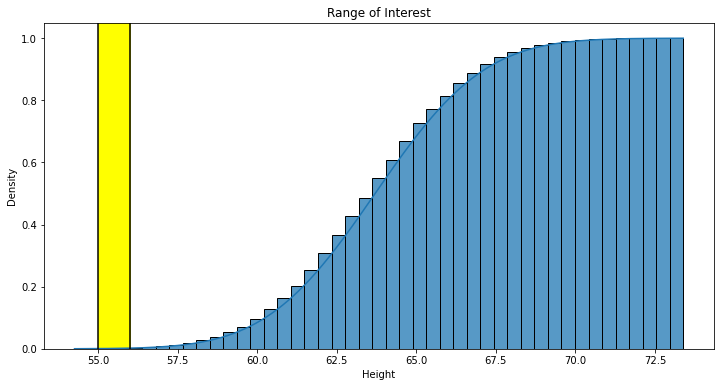

In [11]:
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(x=data, stat='density', cumulative= True)
ax.plot(x_range, cdf)
ax.axvline(low_end, color='black')
ax.axvline(high_end, color='black')
ax.axvspan(low_end, high_end, color = 'yellow', zorder = 0)
ax.set_title('Range of Interest');

In [12]:
stats.norm.cdf(high_end, loc=mean, scale=std) - stats.norm.cdf(low_end, loc=mean, scale=std)

0.0015043054289556436

There is a 0.15% chance a randomly selected female with be between 55 and 56 inches tall

# 2

In [13]:
stats.norm.cdf(60, loc=mean, scale=std)

0.084464927252063

There is an 8.4% chance a randomly selected female will be less than 5 feet tall

# 3

This is a normal distribution, so mean and median are equal. Therefore, there should be a 50% chance that a randomly selected female will be taller than average.

In [15]:
stats.norm.cdf(mean, loc=mean, scale=std)

0.5

yup